# KNN -  Detecting rocks or mines through sonar

### About the project

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


### Data Source: 
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data source: sonar-all-data.csv

In [2]:
df = pd.read_csv('knn-project-mine-rock.csv')

In [3]:
# Each frequency is a different feature -- Target: R (rock) or M (mine)
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
print('Unique abs target values\n', df['Label'].value_counts())
print('\n')
print('Relative freq target values\n',df['Label'].value_counts()/len(df))

Unique abs target values
 M    111
R     97
Name: Label, dtype: int64


Relative freq target values
 M    0.533654
R    0.466346
Name: Label, dtype: float64


<AxesSubplot:xlabel='Label', ylabel='count'>

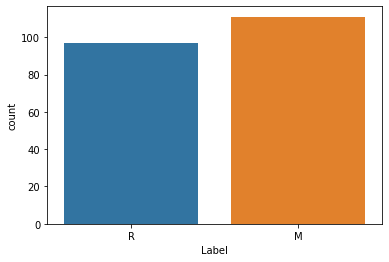

In [5]:
sns.countplot(x='Label', data= df)

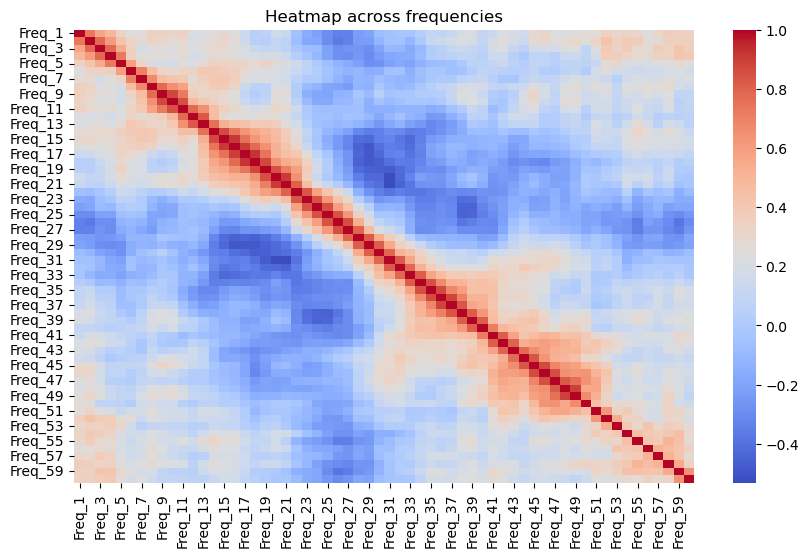

In [6]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(data=df.corr(), cmap='coolwarm')
plt.title('Heatmap across frequencies')
plt.show()

### Mapping values and evaluating correlation among features

In [7]:
df['Target'] = df['Label'].map({'R':0, 'M':1})

In [8]:
df['Target'].value_counts()

1    111
0     97
Name: Target, dtype: int64

In [9]:
# Top 5 features correlated with Target
np.abs(df.corr()['Target']).sort_values(ascending=False).head(6)[1:]

Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

### Implementing KNN Model

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
X = df.drop(['Target', 'Label'], axis = 1)
y = df['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
knn_model = KNeighborsClassifier()

In [15]:
grid_param = {'n_neighbors':list(range(1,30))}
grid_param

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29]}

In [16]:
grid = GridSearchCV(knn_model, param_grid=grid_param, cv=5, scoring='accuracy')

In [17]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [18]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [19]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred_grid = grid.predict(scaled_X_test)

In [21]:
accuracy_score(y_test, y_pred_grid)

0.9047619047619048

In [22]:
# You can go this way and train the model with the hyperparameter defined previously (k=1)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)
y_pred = knn_model.predict(scaled_X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9047619047619048

In [31]:
accuracy_array = grid.cv_results_['mean_test_score']
accuracy_series = pd.Series(data=accuracy_array, index=range(1,30))
accuracy_series

1     0.856188
2     0.829303
3     0.775249
4     0.764723
5     0.764723
6     0.759602
7     0.748791
8     0.738265
9     0.711238
10    0.727596
11    0.705832
12    0.716927
13    0.689900
14    0.722333
15    0.684637
16    0.695733
17    0.705974
18    0.695306
19    0.711238
20    0.722048
21    0.695306
22    0.679232
23    0.689900
24    0.695306
25    0.700711
26    0.700853
27    0.673969
28    0.684922
29    0.679232
dtype: float64

Text(0, 0.5, 'Accuracy')

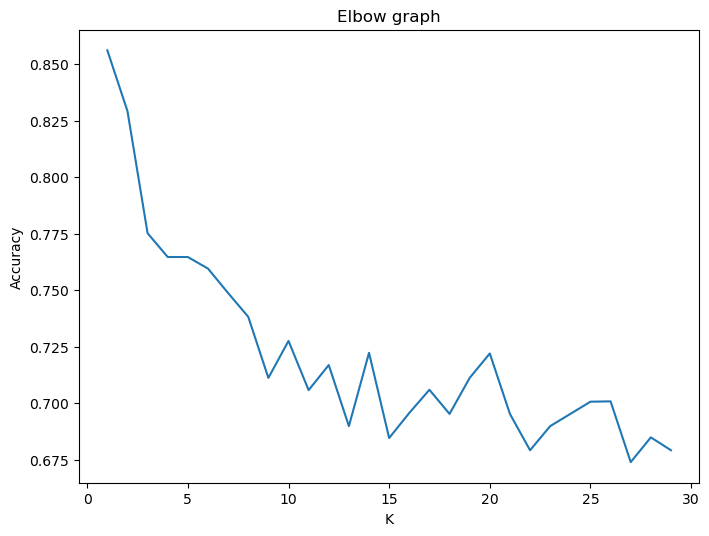

In [55]:
plt.figure(figsize=(8,6), dpi=100)
sns.lineplot(x=accuracy_series.index, y = accuracy_series.values)
plt.title('Elbow graph')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

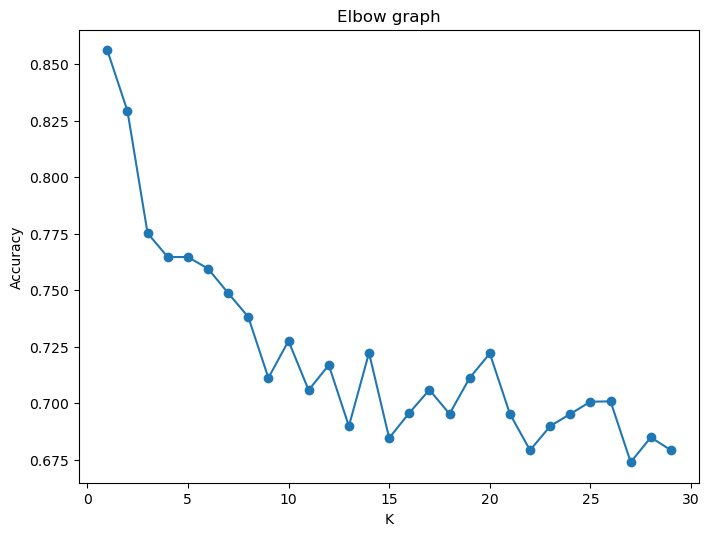

In [59]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(accuracy_series.index, accuracy_series.values, 'o-')
plt.title('Elbow graph')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



-------

## IMPLEMENTING SAME MODEL USING PIPELINE & GRIDSEARCHCV

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [61]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [62]:
operations = [('scaler', scaler), ('knn', knn)]

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipe = Pipeline(operations)

In [66]:
k_values = list(range(1,30))

In [67]:
param_grid = {'knn__n_neighbors':k_values}

In [68]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [69]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [70]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [72]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [77]:
pd.DataFrame(full_cv_classifier.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004712,0.000834,0.004477,0.000673,1,{'knn__n_neighbors': 1},0.894737,0.710526,0.837838,0.918919,0.864865,0.845377,0.072755,1
1,0.003664,0.000383,0.003157,0.000264,2,{'knn__n_neighbors': 2},0.842105,0.710526,0.783784,0.918919,0.918919,0.834851,0.080314,2
2,0.003293,0.000220,0.003028,0.000214,3,{'knn__n_neighbors': 3},0.894737,0.684211,0.783784,0.729730,0.783784,0.775249,0.070403,3
3,0.003184,0.000160,0.002867,0.000159,4,{'knn__n_neighbors': 4},0.842105,0.657895,0.783784,0.675676,0.864865,0.764865,0.084524,4
4,0.003196,0.000165,0.002917,0.000161,5,{'knn__n_neighbors': 5},0.894737,0.631579,0.783784,0.675676,0.810811,0.759317,0.094765,7


In [78]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.83485064, 0.77524893, 0.76486486, 0.75931721,
       0.75974395, 0.75945946, 0.74352774, 0.7113798 , 0.73812233,
       0.70042674, 0.72759602, 0.68449502, 0.70085349, 0.69530583,
       0.69544808, 0.7113798 , 0.71678521, 0.72204836, 0.71664296,
       0.70071124, 0.69544808, 0.69530583, 0.69004267, 0.68477952,
       0.6688478 , 0.67411095, 0.67411095, 0.6685633 ])

In [79]:
accuracy_results = pd.Series(index=range(1,30), data=full_cv_classifier.cv_results_['mean_test_score'])
accuracy_results

1     0.845377
2     0.834851
3     0.775249
4     0.764865
5     0.759317
6     0.759744
7     0.759459
8     0.743528
9     0.711380
10    0.738122
11    0.700427
12    0.727596
13    0.684495
14    0.700853
15    0.695306
16    0.695448
17    0.711380
18    0.716785
19    0.722048
20    0.716643
21    0.700711
22    0.695448
23    0.695306
24    0.690043
25    0.684780
26    0.668848
27    0.674111
28    0.674111
29    0.668563
dtype: float64

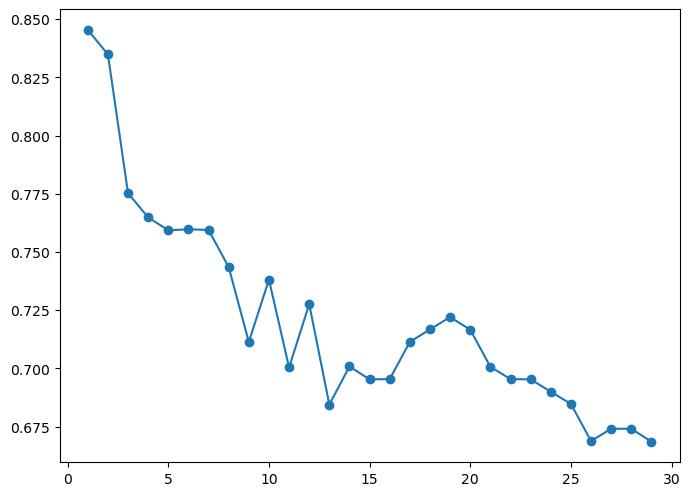

In [82]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(accuracy_results.index, accuracy_results.values, 'o-')

In [83]:
y_pred_pipeline = full_cv_classifier.predict(X_test)
accuracy_score(y_test, y_pred_pipeline)

0.9047619047619048

In [84]:
print(classification_report(y_test, y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



-----